### Stitched FOVs visualization

In [1]:
import napari
import numpy as np
import pandas as pd
from readClasses import readDoryImg
import matplotlib.pyplot as plt

In [5]:
stitched_img = readDoryImg('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/cells/100uM_data/output/stitched_bit1420230312_2114/stitched__20230312_2114.dax')
print(stitched_img.shape)
print(type(stitched_img))

(8771, 8809)
<class 'numpy.ndarray'>


In [19]:
GS_genes_data = pd.read_csv('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/cells/colocaldist4_20230312/Cell_LM39_25FOVs_GuidestarGenes_training_dist4.csv')
GS_genes_data = GS_genes_data[['x','y','fov','gene','Label']]

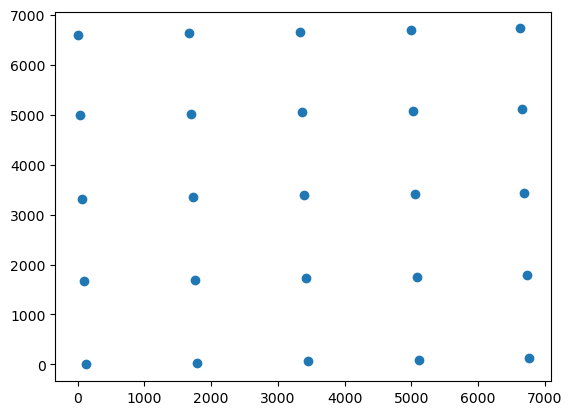

In [13]:
global_coords = pd.read_csv('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/cells/100uM_data/output/stitched_bit1420230312_2114/FOV_globalcoords.tsv',delimiter='\t')
plt.scatter(global_coords['x_coord'], global_coords['y_coord'])

In [ ]:
GS_genes_data = pd.merge(GS_genes_data,global_coords,on='fov',how='left')
GS_genes_data['global_x'] = GS_genes_data['x'] + GS_genes_data['y_coord']
GS_genes_data['global_y'] = GS_genes_data['y'] + GS_genes_data['x_coord']

In [27]:
viewer = napari.view_image(stitched_img)

# ALL genes good to visualize alignment
# points_layer = viewer.add_points(GS_genes_data[['global_x','global_y']].values,face_color='blue',edge_color='blue')

In [28]:
acly_points = viewer.add_points(GS_genes_data[['global_x','global_y']].loc[GS_genes_data['gene']=='Acly'].values,
                                face_color='blue',edge_color='blue')
gpam_points = viewer.add_points(GS_genes_data[['global_x','global_y']].loc[GS_genes_data['gene']=='Gpam'].values,
                                face_color='yellow',edge_color='yellow')
hnf4a_points = viewer.add_points(GS_genes_data[['global_x','global_y']].loc[GS_genes_data['gene']=='Hnf4a'].values,
                                face_color='red',edge_color='red')
ube2z_points = viewer.add_points(GS_genes_data[['global_x','global_y']].loc[GS_genes_data['gene']=='Ube2z'].values,
                                face_color='green',edge_color='green')

2023-03-20 09:16:26.669 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:52.984 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:52.999 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:53.024 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:53.050 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:53.063 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:53.078 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:53.104 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:53.118 python[87553:4400211] +[CATransaction synchronize] called within transaction
2023-03-20 09:16:53.132 python[87553:4400211] +[CATransaction synchronize] called within tr

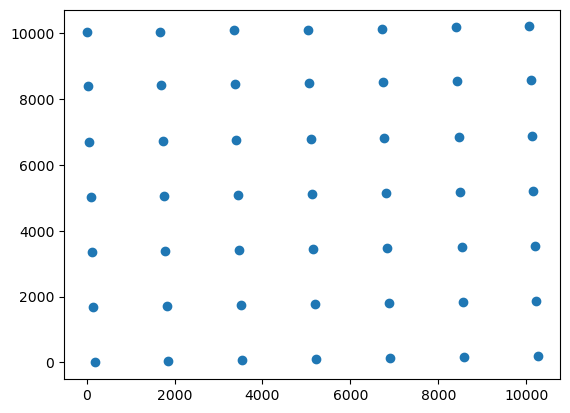

In [4]:
stitched_liver = readDoryImg('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/tissue/Data_60uM/output/stitched_bit1420230326_2252/stitched__20230326_2253.dax')
liver_coords = pd.read_csv('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/tissue/Data_60uM/output/stitched_bit1420230326_2128/FOV_globalcoords.tsv', delimiter='\t')
plt.scatter(liver_coords['x_coord'], liver_coords['y_coord'])

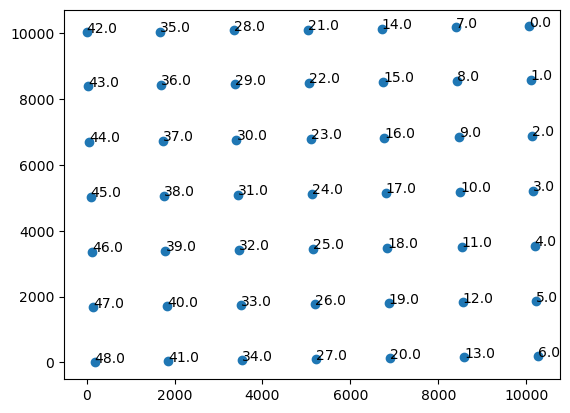

In [16]:
plt.scatter(liver_coords['x_coord'], liver_coords['y_coord'])

for i, row in liver_coords.iterrows():
    plt.annotate(row['fov'], (row['x_coord'], row['y_coord']))

In [2]:
GS_genes_data_liver = pd.read_csv('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/tissue/colocaldist4_20230326/Liver_LM39_49FOVs_GuidestarGenes_training_dist4.csv')
GS_genes_data_liver = GS_genes_data_liver[['x','y','fov','gene','Label']]

In [5]:
GS_genes_data_liver = pd.merge(GS_genes_data_liver,liver_coords,on='fov',how='left')
GS_genes_data_liver['global_x'] = GS_genes_data_liver['x'] + GS_genes_data_liver['y_coord']
GS_genes_data_liver['global_y'] = GS_genes_data_liver['y'] + GS_genes_data_liver['x_coord']

In [21]:
viewer = napari.view_image(stitched_liver, scale=[0.115,0.115])
acly_points = viewer.add_points(GS_genes_data_liver[['global_x','global_y']].loc[GS_genes_data_liver['gene']=='Acly'].values,
                                face_color='#00dc00ff',edge_color='#00dc00ff',size=20, scale=[0.115,0.115])
gpam_points = viewer.add_points(GS_genes_data_liver[['global_x','global_y']].loc[GS_genes_data_liver['gene']=='Gpam'].values,
                                face_color='magenta',edge_color='magenta',size=20, scale=[0.115,0.115])
hnf4a_points = viewer.add_points(GS_genes_data_liver[['global_x','global_y']].loc[GS_genes_data_liver['gene']=='Hnf4a'].values,
                                face_color='cyan',edge_color='cyan',size=20, scale=[0.115,0.115])
pigr_points = viewer.add_points(GS_genes_data_liver[['global_x','global_y']].loc[GS_genes_data_liver['gene']=='Pigr'].values,
                                face_color='yellow',edge_color='yellow',size=5, opacity=0.7, scale=[0.115,0.115])
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

2023-05-28 16:17:10.480 python[5496:328776] +[CATransaction synchronize] called within transaction
2023-05-28 16:17:46.171 python[5496:328776] +[CATransaction synchronize] called within transaction


In [36]:
merfish_liver = pd.read_csv('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/tissue/Liver_LM39_49FOVs_MerfishData.csv')
merfish_liver = merfish_liver[['x','y','fov','gene','Label']]
merfish_liver = pd.merge(merfish_liver,liver_coords,on='fov',how='left')
merfish_liver['global_x'] = merfish_liver['x'] + merfish_liver['y_coord']
merfish_liver['global_y'] = merfish_liver['y'] + merfish_liver['x_coord']

np.unique(merfish_liver['gene'],return_counts=True)

(array(['1700017B05Rik', 'AW554918', 'Aatk', 'Abca5', 'Abcc3', 'Acly',
        'Adcy7', 'Add3', 'Alms1', 'Ammecr1', 'Ankrd26', 'Armcx4', 'Atp11b',
        'Atp8b5', 'Bcl9l', 'Blank1', 'Blank2', 'Blank3', 'Blank4',
        'Blank5', 'Blank6', 'Blank7', 'Brip1', 'C3ar1', 'Capn5', 'Ccdc88b',
        'Cdc42bpb', 'Cdh5', 'Cdk19', 'Cftr', 'Chic1', 'Clptm1', 'Cnnm1',
        'Cog3', 'Col4a4', 'Cps1', 'Cpt1a', 'Ddx17', 'Ddx3x', 'Dennd5a',
        'Des', 'Dgkq', 'Dpyd', 'Dsg1c', 'Dync2h1', 'Egflam', 'Enpp4',
        'Exoc2', 'Fads6', 'Fam102b', 'Fastkd2', 'Flii', 'Flnb', 'G6pc',
        'Ganab', 'Ggt1', 'Glud1', 'Glul', 'Gns', 'Golga2', 'Golga4',
        'Gpam', 'Gpc1', 'Gpd2', 'Hcn3', 'Hecw2', 'Hnf1b', 'Hnf4a',
        'Hs3st3b1', 'Ide', 'Iffo2', 'Igdcc4', 'Igf1', 'Il4ra', 'Itga4',
        'Kif7', 'Krt7', 'Lama3', 'Lrat', 'Lrrc16b', 'Lrrc3', 'Lrtm1',
        'Mcam', 'Megf8', 'Mob3b', 'Mphosph9', 'Mybbp1a', 'Ncs1', 'Nol6',
        'Nova2', 'Paqr9', 'Paxip1', 'Pcdh17', 'Pck1', 'Pdxk', 'Pecam1',


In [38]:
select_genes = ['Blank1', 'Blank2', 'Blank3', 'Blank4','Blank5', 'Blank6', 'Blank7']

points_layer = viewer.add_points(merfish_liver[['global_x','global_y']].loc[merfish_liver['gene'].isin(select_genes)].values,
                                 face_color='blue',edge_color='blue')

In [17]:
fov0 = readDoryImg('/Volumes/Seagate Backup Plus Drive/1 year RA data/Guidestar files/tissue/Data_60uM/Cy7_02_00.dax')
viewer2 = napari.view_image(fov0)

In [18]:
pigr_points = viewer2.add_points(GS_genes_data_liver[['x','y']].loc[(GS_genes_data_liver['gene']=='Pigr') & (GS_genes_data_liver['fov']==0)].values,
                                face_color='green',edge_color='green')

In [19]:
fov0_points = viewer2.add_points(GS_genes_data_liver[['x','y']].loc[(GS_genes_data_liver['gene'].isin(['Acly','Gpam','Hnf4a'])) & (GS_genes_data_liver['fov']==0)].values,
                                face_color='green',edge_color='blue')